In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
import numpy as np
import pickle

# Settings
dates = ['150201', '150217', '150321']
vote_result_file_name = 'vote_result_after_using_context.pickle'

In [9]:
with open('homogenize_lot_%s.pickle' % dates[0], 'rb') as classifier_file:
    classifier1 = pickle.load(classifier_file)

with open('homogenize_lot_%s.pickle' % dates[1], 'rb') as classifier_file:
    classifier2 = pickle.load(classifier_file)

with open('homogenize_lot_%s.pickle' % dates[2], 'rb') as classifier_file:
    classifier3 = pickle.load(classifier_file)

In [10]:
def votation(options):
    """
    Gives the three options, chooses one of them.
    How? we choose the one which appears more times.
    """
    result = Counter(options)
    return sorted(result, key=lambda x:result[x])[-1]


In [11]:
def context_votation(mlist):
    """
    Choose a value looking the context (3x3).
    """
    # chain(*mlist) a list of arrays. chain(*chain(mlist)) a list of values
    cter = Counter(chain(*chain(*mlist)))
    # The last one is the one
    result = sorted(cter, key=lambda x: cter[x])[-1]
    return result

In [12]:
def make_votation(m1, m2, m3):
    """
    Return a new matrix with the votation.
    """
    assert m1.shape == m3.shape == m3.shape
    rows, cols = m1.shape
    result = np.zeros(m1.shape)
    for col in range(0, cols):
        for row in range(0, rows):
            option1 = m1[row][col]
            option2 = m2[row][col]
            option3 = m3[row][col]
            if option1 != option2 and option1 != option3 and option2 != option3:
                # result[row][col] = option3
                result[row][col] = context_votation([
                    m1[max(row-1, 0):min(row+2, rows), max(col-1, 0):min(col+2, rows)],
                    m2[max(row-1, 0):min(row+2, rows), max(col-1, 0):min(col+2, rows)],
                    m3[max(row-1, 0):min(row+2, rows), max(col-1, 0):min(col+2, rows)]
                ])
            else:
                result[row][col] = votation([option1, option2, option3])
    return result
# If you are using classifier_predicted_<date>, you have to use classifierX['classification']
result = make_votation(
            classifier1,
            classifier2,
            classifier3)

In [13]:
with open(vote_result_file_name, 'wb') as vote_result:
    pickle.dump(result, vote_result)

<IPython.core.display.Javascript object>


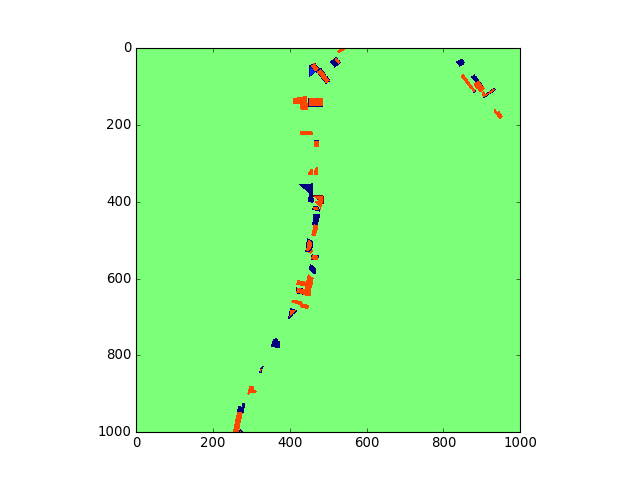

In [14]:
plt.figure()
plt.imshow(result[5000:6000, 5000:6000], interpolation='none')